<a href="https://colab.research.google.com/github/PeixotoJr/APD/blob/main/ST_Decomposicao_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance==0.2.54
!pip install dash
!pip install python-bcb

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.7 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=fb97faeb6065fde47d4c23bd6769cec530d7fb6763bd8f3e252e8377af030770
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
# Importando a biblioteca yfinance para obter dados financeiros de ações e índices
import yfinance as yf

# Importando a biblioteca pandas para manipulação e análise de dados
import pandas as pd

# Importando a biblioteca numpy para operações matemáticas e manipulação de arrays
import numpy as np

# Importando a biblioteca statsmodels.api para análise estatística, incluindo modelos de regressão
import statsmodels.api as sm

# Importando a biblioteca matplotlib.pyplot para visualização de dados através de gráficos
import matplotlib.pyplot as plt

# Importando a biblioteca seaborn para criar gráficos estatísticos mais avançados e visualmente atraentes
import seaborn as sns

# Importando a biblioteca plotly.express para criar gráficos interativos de forma simplificada
import plotly.express as px

import warnings
# Desativar temporariamente os warnings
warnings.filterwarnings('ignore')

import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

#https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [ ]:
# Cria uma lista com os códigos dos ativos (ações e câmbio) no formato utilizado pelo Yahoo Finance
etf_lista = ['BOVA11.SA','MDIA3.SA', 'AERI3.SA', 'PGMN3.SA', 'BNBR3.SA', 'GRND3.SA', 'COCE5.SA', 'BRST3.SA', 'HAPV3.SA']

# Junta todos os códigos em uma única string, separados por espaço
etf = ' '.join(etf_lista)

# Baixa os dados históricos de todos os ativos da lista desde o ano 2000
# O parâmetro `auto_adjust=True` ajusta os preços considerando eventos como desdobramentos e dividendos
# Intevalor diáio
df = yf.download(etf, start='2020-01-01', auto_adjust=True)
# intervalo Mensal
#df = yf.download(etf, start='2020-01-01', interval="1mo",auto_adjust=True)
# O dataframe `df` conterá os dados históricos dos ativos, incluindo preços de abertura, fechamento, máxima e mínima.

[*********************100%***********************]  9 of 9 completed


In [ ]:
# Exibe as primeiras 5 linhas do DataFrame (por padrão)
# Isso ajuda a visualizar rapidamente a estrutura dos dados
print(df.head())

# Exibe informações gerais sobre o DataFrame
# Inclui número de entradas, tipos de dados e valores nulos
print(df.info())

Price         Close                                                       \
Ticker     AERI3.SA   BNBR3.SA   BOVA11.SA BRST3.SA   COCE5.SA  GRND3.SA   
Date                                                                       
2020-01-02      NaN  67.691589  114.239998      NaN  51.951736  8.290412   
2020-01-03      NaN  69.198250  113.800003      NaN  52.367348  8.378035   
2020-01-06      NaN  68.484558  112.589996      NaN  51.793808  8.276935   
2020-01-07      NaN  68.484558  112.239998      NaN  52.201107  8.701562   
2020-01-08      NaN  68.484558  111.949997      NaN  52.201107  8.674603   

Price                                         High  ...     Open   Volume  \
Ticker       HAPV3.SA   MDIA3.SA PGMN3.SA AERI3.SA  ... PGMN3.SA AERI3.SA   
Date                                                ...                     
2020-01-02  13.162340  34.567280      NaN      NaN  ...      NaN      NaN   
2020-01-03  13.719027  34.963085      NaN      NaN  ...      NaN      NaN   
2020-0

In [ ]:
# Para cada ETF na lista de ETFs
for etf in etf_lista:
    # Calcula a rentabilidade diária (ou no intervalo dos dados) do ETF
    # Usando a função pct_change(), que calcula a variação percentual entre os valores consecutivos
    # A rentabilidade é armazenada em uma nova coluna no DataFrame com a chave ('Return', etf)
  df[('Return', etf)] = df[('Close', etf)].pct_change()*100
  #df[('Return', etf)] = df[('Close', etf)]
df=df['Return']

In [ ]:
df.head()

Ticker,BOVA11.SA,MDIA3.SA,AERI3.SA,PGMN3.SA,BNBR3.SA,GRND3.SA,COCE5.SA,BRST3.SA,HAPV3.SA
Date,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.385150,1.145029,NaN,NaN,2.225772,1.056915,0.799995,NaN,4.229388
2020-01-06,-1.063275,1.207546,NaN,NaN,-1.031372,-1.206727,-1.095224,NaN,-3.083388
2020-01-07,-0.310861,-3.430300,NaN,NaN,0.000000,5.130248,0.786386,NaN,-2.747900
2020-01-08,-0.258376,0.875177,NaN,NaN,0.000000,-0.309823,0.000000,NaN,-2.057745


In [ ]:
# Suponha que 'df' seja um DataFrame do pandas e que seu índice contenha datas
# Converte o índice do DataFrame para o formato de string 'YYYY-MM-DD'
df.index = df.index.strftime('%Y-%m-%d')

# Explicação:
# 1. df.index: Acessa o índice do DataFrame, que pode estar no formato de datetime.
# 2. .strftime('%Y-%m-%d'): Converte cada data do índice para uma string no formato 'ano-mês-dia'.
# 3. df.index = ...: Atribui as datas formatadas de volta ao índice do DataFrame.
# Após essa conversão, o índice do DataFrame, que antes podia estar em formato datetime, agora estará como strings.

In [ ]:
# Exibe os nomes das colunas do DataFrame
df.columns

# Renomeia o eixo dos rótulos do índice para 'ds' (útil quando se trabalha com séries temporais)
df.rename_axis('ds', inplace=True)

# Substitui valores NaN por 0
df.fillna(0, inplace=True)

# Multiplica apenas as colunas numéricas por 100
cols_numericas = df.select_dtypes(include=['number']).columns
df[cols_numericas] = df[cols_numericas] * 100

# Exibe as primeiras 5 linhas do DataFrame
df.head()

Ticker,BOVA11.SA,MDIA3.SA,AERI3.SA,PGMN3.SA,BNBR3.SA,GRND3.SA,COCE5.SA,BRST3.SA,HAPV3.SA
ds,,,,,,,,,
2020-01-02,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2020-01-03,-38.514953,114.502894,0.0,0.0,222.577203,105.691542,79.999495,0.0,422.938774
2020-01-06,-106.327476,120.754628,0.0,0.0,-103.137249,-120.672655,-109.522395,0.0,-308.338805
2020-01-07,-31.086108,-343.030037,0.0,0.0,0.000000,513.024838,78.638559,0.0,-274.789998
2020-01-08,-25.837573,87.517721,0.0,0.0,0.000000,-30.982276,0.000000,0.0,-205.774504


In [ ]:
df = df.reset_index()

# Convert your time column to datetime if it's not already
df['ds'] = pd.to_datetime(df['ds'])

# Set the datetime column as index
df.set_index('ds', inplace=True)

# Ensure the DataFrame has a frequency set
#df = df.asfreq('M')

In [ ]:
df

Ticker,BOVA11.SA,MDIA3.SA,AERI3.SA,PGMN3.SA,BNBR3.SA,GRND3.SA,COCE5.SA,BRST3.SA,HAPV3.SA
ds,,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,-38.514953,114.502894,0.000000,0.000000,222.577203,105.691542,79.999495,0.000000,422.938774
2020-01-06,-106.327476,120.754628,0.000000,0.000000,-103.137249,-120.672655,-109.522395,0.000000,-308.338805
2020-01-07,-31.086108,-343.030037,0.000000,0.000000,0.000000,513.024838,78.638559,0.000000,-274.789998
2020-01-08,-25.837573,87.517721,0.000000,0.000000,0.000000,-30.982276,0.000000,0.000000,-205.774504
...,...,...,...,...,...,...,...,...,...
2025-03-12,15.760664,-299.914635,-330.789090,392.857626,0.000000,-87.107519,141.699783,-211.267411,97.087289
2025-03-13,146.596348,53.003906,52.631529,206.185364,0.000000,263.620552,-27.943991,0.000000,0.000000
2025-03-14,264.468028,232.864974,287.958470,303.030011,0.000000,-34.246542,-384.307086,287.769513,480.769936


In [ ]:
print(df['BOVA11.SA'].isnull().sum())  # Shows how many missing values there are

0


In [ ]:
def decompose_and_plot(df):
    for column in df.columns:
        # Decompose the series
        result = seasonal_decompose(df[column], model='additive', period=12)

        # Create a plot for each series
        fig = go.Figure()

        # Add the decomposed components as traces
        fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name=f'{column} Trend'))
        fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name=f'{column} Seasonal'))
        fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name=f'{column} Residual'))

        # Update layout for the interactive plot
        fig.update_layout(
            title=f"Decomposition of {column}",
            xaxis_title='Date',
            yaxis_title='Value',
            template='plotly_dark',
            showlegend=True
        )

        # Show the plot
        fig.show()

In [ ]:
# Apply the function to your DataFrame
decompose_and_plot(df)

In [ ]:
# Salva o DataFrame 'df' em um arquivo CSV chamado 'variacoes_acoes.csv'
# O parâmetro 'sep=";"' define o ponto e vírgula como delimitador entre os valores
df.to_csv('variacoes_acoes.csv', sep=';')
# O arquivo gerado pode ser aberto em editores de texto ou planilhas (Excel, Google Sheets),
# desde que esteja configurado para reconhecer o delimitador correto.

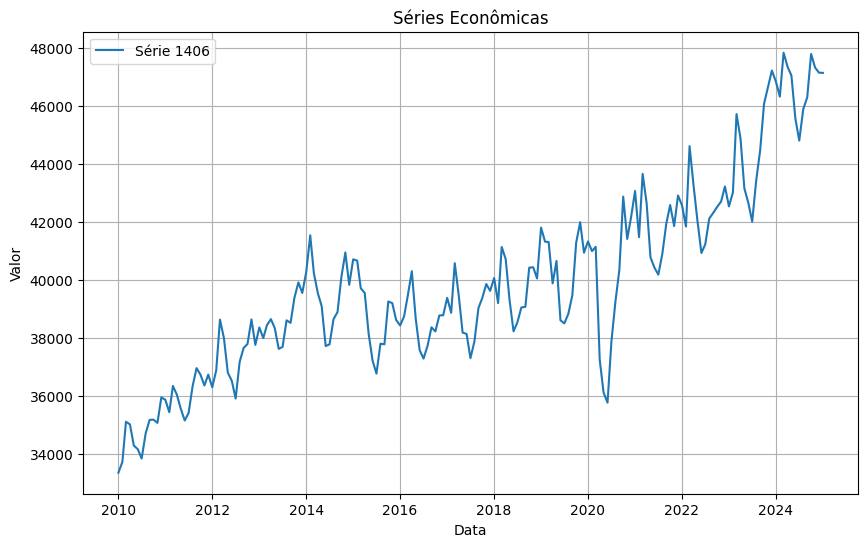

In [ ]:
from bcb import sgs
import pandas as pd
import matplotlib.pyplot as plt

# Lista de códigos das séries desejadas
codigos = [1406]  # Exemplo: 433 é a Taxa Selic, 433 é o IPCA, 11 é o PIB

# Dicionário para armazenar os dados das séries
series = {}

# Definir a data final como o dia atual
data_final = pd.to_datetime('today')

# Definir a data inicial como 5 anos atrás
data_inicial = data_final - pd.DateOffset(years=5)

# Converter as datas para o formato correto
#data_inicial = data_inicial.strftime('%Y-%m-%d')
#data_final = data_final.strftime('%Y-%m-%d')

# Obter as séries do SGS
for codigo in codigos:
    series[codigo] = sgs.get(codigo, start='2010-01-01', end='2026-01-01')
    # Obter a série do Banco Central com o intervalo de 5 anos

# Plotar as séries
plt.figure(figsize=(10, 6))
for codigo, serie in series.items():
    plt.plot(serie.index, serie.values, label=f'Série {codigo}')

plt.title('Séries Econômicas')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
series

{1406:              1406
 Date             
 2010-01-01  33360
 2010-02-01  33730
 2010-03-01  35117
 2010-04-01  35026
 2010-05-01  34297
 ...           ...
 2024-09-01  46300
 2024-10-01  47795
 2024-11-01  47325
 2024-12-01  47149
 2025-01-01  47143
 
 [181 rows x 1 columns]}

In [ ]:
result = seasonal_decompose(series[codigo], model='additive', period=12)

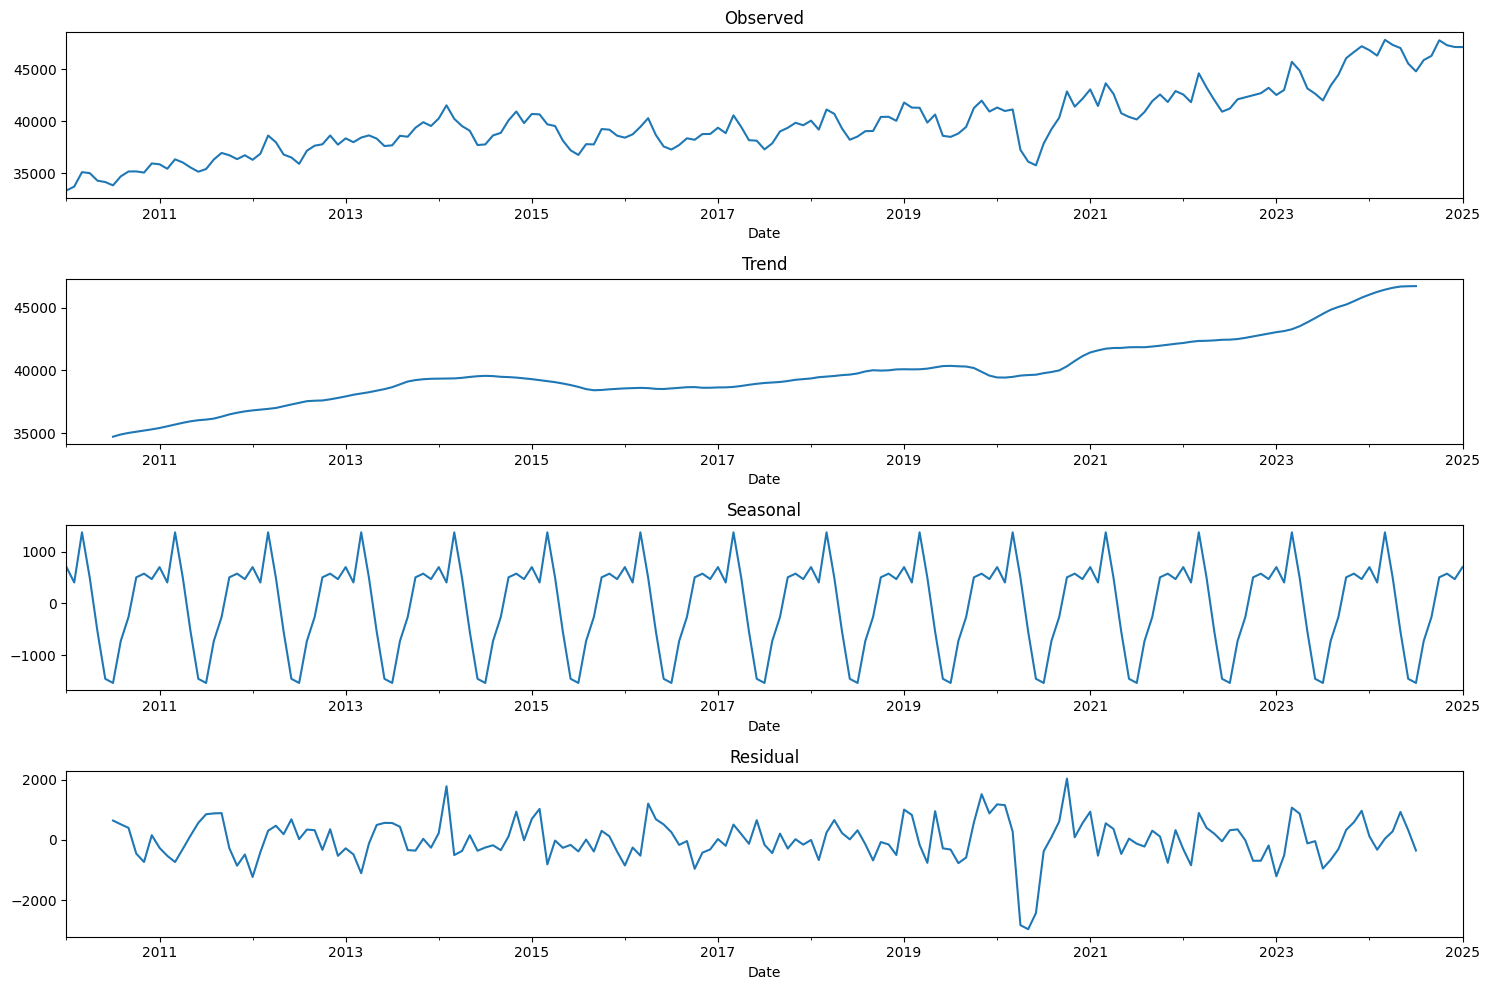

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

# Plotar os componentes da decomposição
components = ['observed', 'trend', 'seasonal', 'resid']
titles = ['Observed', 'Trend', 'Seasonal', 'Residual']

for ax, component, title in zip(axes, components, titles):
    getattr(result, component).plot(ax=ax)
    ax.set_title(title)

# Ajuste do layout
plt.tight_layout()
plt.show()